In [ ]:
from expansion_tools.blob_expansion_tools_jetset import *
from processing.fix_numba_issue import load_model

from jetset.data_loader import Data,ObsData
from jetset.plot_sedfit import PlotSED


## Notebook to run the simulations with only adiabatic cooling, necessary for the analysis in Section 5.1

In [2]:
sed_data = ObsData(data_table=Data.from_file('sed_mrk421_mjd_56302.ecsv'))
fit_model=load_model()

In [3]:
rest_frame='obs'
delta_t_out=1E3
t_exp=0

## loading flaring state simulation

In [4]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val

def delta_t_est(t_exp,R0,beta_exp):
    return t_exp+R0/(beta_exp*3E10)

def t_dec_est(R0,a,beta_exp):
    return ((R0+beta_exp*3E10)*np.power(beta_exp*3E10,a))

beta_exp=np.logspace(-3,np.log10(0.3),10)



Set `run=False` if you have already run the simulations, and you want only to regenerate lcs or SEDs

In [5]:
run=True
for ID,v in enumerate(beta_exp):
    duration=delta_t_est(t_exp,R0,v)+10*t_dec_est(R0,-1,v)
    T_SIZE=np.int(duration/1000)
    NUM_SET=np.int(T_SIZE)
    NUM_SET=min(5000,NUM_SET)
    NUM_SET=max(1000,NUM_SET)
    print('ID',ID)
    print('beta_exp %f'%v)
    print('delta_t  est. %e (d)'%(delta_t_est(t_exp,R0,v)/86400))
    print('t_dec  est. %e (d)'%(t_dec_est(R0,-1,v)/86400))
    print('delta_t  est. %e (s)'%(delta_t_est(t_exp,R0,v)))
    print('t_dec  est. %e (s)'%(t_dec_est(R0,-1,v)))
    print('duration %e'%duration)
    print('T_SIZE %d'%T_SIZE)
    print('NUM_SET %d'%NUM_SET)
    run_adiabatic_exp(sed_data,
                      fit_model,
                      'temp_ev_sim_exp_change_beta_no_synch_cooling',
                      temp_ev_acc_flare,
                      flare_duration=0,
                      duration=duration,
                      delta_t_out=delta_t_out,
                      T_esc_rad=1E60,
                      rest_frame=rest_frame,
                      T_SIZE=T_SIZE,
                      NUM_SET=NUM_SET,
                      run=run,
                      beta_exp=v,
                      t_exp=t_exp,
                      synch_cooling_off=True,
                      cache_SEDs_rad=True,
                      m_B=1)
    
   
    print('----------------------------------------------')

ID 0
beta_exp 0.001000
delta_t  est. 1.929012e+03 (d)
t_dec  est. 1.929012e+03 (d)
delta_t  est. 1.666667e+08 (s)
t_dec  est. 1.666667e+08 (s)
duration 1.833333e+09
T_SIZE 1833333
NUM_SET 5000
==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
temporal evolution running


  0%|          | 0/1833333 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done


FileNotFoundError: [Errno 2] No such file or directory: 'temp_ev_sim_exp_change_beta_no_synch_cooling/lc_obs_beta_exp=0.001.pkl'

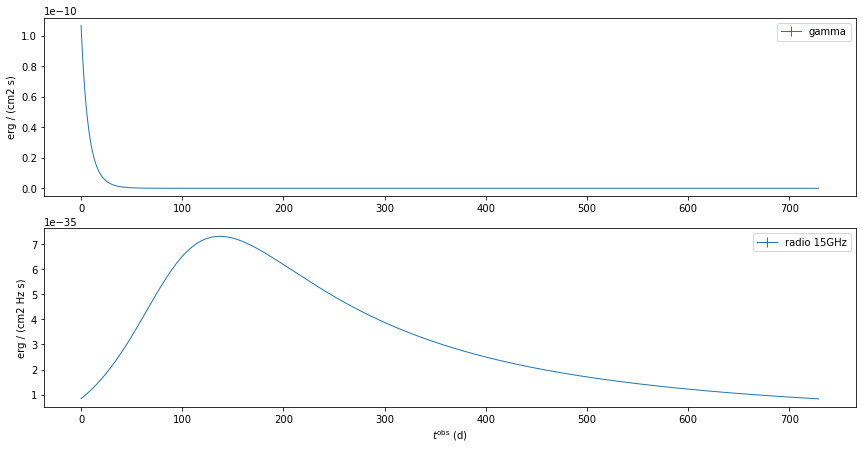

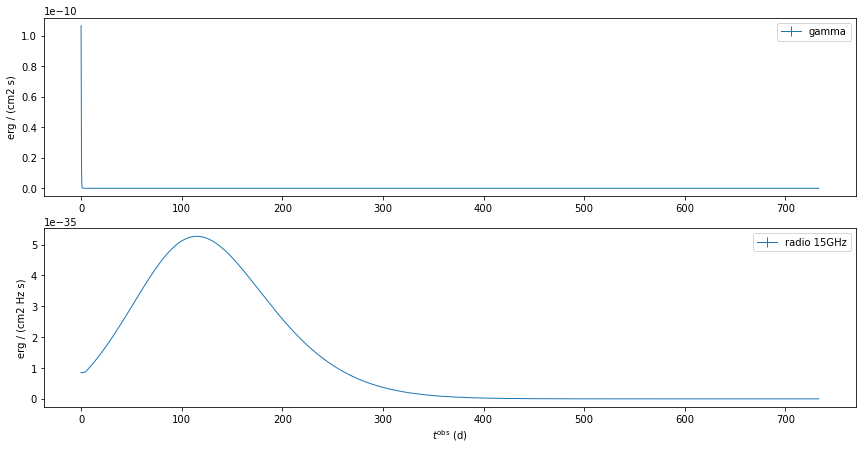

In [6]:
from expansion_tools.delay_analysis import plot_lcs

d=plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta_no_synch_cooling/lc_obs_beta_exp=0.001.pkl',lcs_names=['lg_obs','lr_obs_15GHz'],flare_lcs=None)
f=plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta/lc_obs_beta_exp=0.001.pkl',lcs_names=['lg_obs','lr_obs_15GHz'],flare_lcs=None)

In [8]:
beta_exp=[0.1]
for ID,v in enumerate(beta_exp):
    duration=delta_t_est(t_exp,R0,v)+10*t_dec_est(R0,-1,v)
    T_SIZE=np.int(duration/1000)
    NUM_SET=np.int(T_SIZE)
    NUM_SET=min(5000,NUM_SET)
    NUM_SET=max(1000,NUM_SET)
    print('ID',ID)
    print('beta_exp %f'%v)
    print('delta_t  est. %e (d)'%(delta_t_est(t_exp,R0,v)/86400))
    print('t_dec  est. %e (d)'%(t_dec_est(R0,-1,v)/86400))
    print('delta_t  est. %e (s)'%(delta_t_est(t_exp,R0,v)))
    print('t_dec  est. %e (s)'%(t_dec_est(R0,-1,v)))
    print('duration %e'%duration)
    print('T_SIZE %d'%T_SIZE)
    print('NUM_SET %d'%NUM_SET)
    run_adiabatic_exp(sed_data,
                      fit_model,
                      'temp_ev_sim_exp_beta_0.1_no_sync_cooling',
                      temp_ev_acc_flare,
                      flare_duration=0,
                      duration=duration,
                      delta_t_out=delta_t_out,
                      T_esc_rad=1E60,
                      rest_frame=rest_frame,
                      T_SIZE=T_SIZE,
                      NUM_SET=NUM_SET,
                      run=run,
                      beta_exp=v,
                      t_exp=t_exp,
                      synch_cooling_off=True,
                      cache_SEDs_rad=True,
                      m_B=1)
    
    
   
    print('----------------------------------------------')    

ID 0
beta_exp 0.100000
delta_t  est. 1.929012e+01 (d)
t_dec  est. 1.929014e+01 (d)
delta_t  est. 1.666667e+06 (s)
t_dec  est. 1.666668e+06 (s)
duration 1.833334e+07
T_SIZE 18333
NUM_SET 5000
==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
temporal evolution running


  0%|          | 0/18333 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 18333343.333333332
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=2.039e+06, R2=1.11129e+16 t/t_ref=2037038.037 t/t_exp=2037038.037 t/duration=0.111 1.00198e+00
t1=000 t2=1111, t2_R=4.078e+06, R2=1.72258e+16 t/t_ref=4074076.074 t/t_exp=4074076.074 t/duration=0.222 1.00255e+00
t1=000 t2=1666, t2_R=6.113e+06, R2=2.33267e+16 t/t_ref=6111114.111 t/t_exp=6111114.111 t/duration=0.333 1.00268e+00
t1=000 t2=2222, t2_R=8.151e+06, R2=2.94365e+16 t/t_ref=8148152.148 t/t_exp=8148152.148 t/duration=0.445 1.00151e+00
t1=000 t2=2777, t2_R=1.019e+07, R2=3.55374e+16 t/t_ref=10185190.185 t/t_exp=10185190.185 t/duration=0.556 9.94654e-01
t1=000 t2=3333, t2_R=1.223e+07, R2=4.16503e+16 t/t_ref=12222228.222 t/t_exp=12222228.222 t/duration=0.667 9.74912e-01
t1=000 t2=3888, t2_R=1.426e+07, R2=4.77512e+16 t/t_ref=14259266.259 t/t_exp=14259266.259 t/duration=0.778 9.41392e-01
t1=000 